<a href="https://colab.research.google.com/github/Raboooiii/Sem6/blob/main/LabCycle_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [4]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X / 255.0          # normalize pixel values
y = y.astype(int)      # convert labels to integers

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
log_reg = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    multi_class='auto'
)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy : 0.9202142857142858
Precision: 0.9199742324856798
Recall   : 0.9202142857142858
F1 Score : 0.920032267333859


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=3000, multi_class='auto'))
])

# Hyperparameter grid
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 5],
    'logreg__solver': ['lbfgs', 'saga']
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [8]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred_tuned))
print("Precision:", precision_score(y_test, y_pred_tuned, average='weighted'))
print("Recall   :", recall_score(y_test, y_pred_tuned, average='weighted'))
print("F1 Score :", f1_score(y_test, y_pred_tuned, average='weighted'))


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [9]:
mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_binary)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y_binary, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train_pca, y_train_pca)


LogisticRegression()

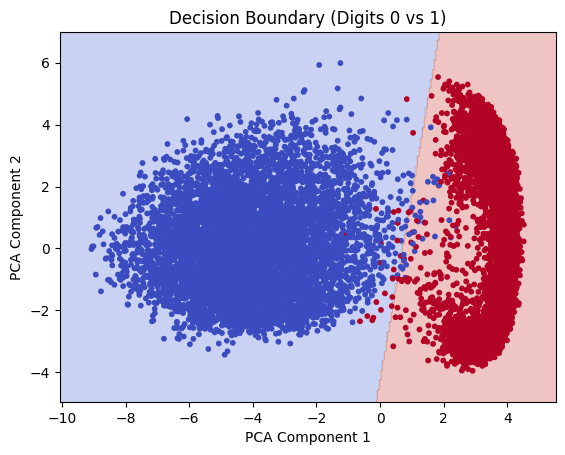

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_binary, cmap='coolwarm', s=10)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary (Digits 0 vs 1)")
plt.show()
